In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
df = pd.read_csv('./Quality.csv',header=None)
df.head(5)

,0,1,2
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


### Plot dataset

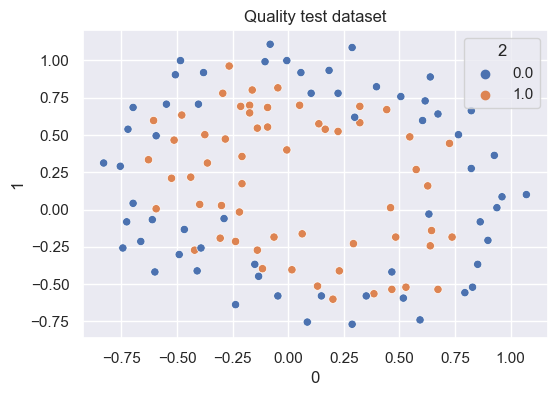

In [3]:
sns.set_theme()
fig = plt.figure(figsize=(6, 4))
plt.title('Quality test dataset')
sns.scatterplot(data=df, x=df[0], y=df[1], hue=df[2]);

### Transformer function

In [4]:
def transformer(x):
    return [x[0], #x_0
            x[1], #x_1
            np.power(x[0],2), #x_0^2
            x[0]*x[1], #x_0 * x_1
            np.power(x[1],2), #x_1^2
            np.power(x[0],3), #x_0^3
            np.power(x[0],2)*x[1], #x_0^2 * x_1
            x[0]*np.power(x[1],2), 
            np.power(x[1],3),
            np.power(x[0],4), 
            np.power(x[0],3)*x[1], 
            np.power(x[0],2)*np.power(x[1],2), 
            x[0]*np.power(x[1],3), np.power(x[1],4),
            np.power(x[0],5), 
            np.power(x[0],4)*x[1], 
            np.power(x[0],3)*np.power(x[1],2), 
            np.power(x[0],2)*np.power(x[1],3), x[0]*np.power(x[1],4), 
            np.power(x[1],5),
            np.power(x[0],6), 
            np.power(x[0],5)*x[1], 
            np.power(x[0],4)*np.power(x[1],2), 
            np.power(x[0],3)*np.power(x[1],3), 
            np.power(x[0],2)*np.power(x[1],4), 
            x[0]*np.power(x[1],5), np.power(x[1],6)]

x = np.array(transformer([df[0], df[1]])).T

#### Normalized data by:  $X-\bar{X}/SE$

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Logistic Regression

### Model Functions

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def logistic_regression(X, y, alpha=0.01, epochs=10000):
    
    N_samples = np.shape(X)[0]  # total number of samples
    N_features = np.shape(X)[1]  # total number of features
 
    # for W_0
    X = np.concatenate((np.ones((N_samples, 1)), X), axis=1)
    weights = np.random.randn(N_features + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for _ in range(epochs):  # begin the process
 
        # z = (theta.T)X, compute the dot product between our feature 'X' and weight 'W'
        # y_estimated = 1/1+exp(-z)
        y_estimated = sigmoid(X.dot(weights))
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
         
        # calculate the cost
        # cost = 1/numberOfsample * ((-y.T)(log(y_estimated)) - ((1-y).T)(log(1-y_estimated))
        cost = (1 /  N_samples) * (np.sum(np.dot(-y.T,(np.log(y_estimated))) \
                                          - np.dot((1 - y).T, np.log(1 - y_estimated))))
 
        
        # Update our gradient by the dot product between
        # divided by the total number of samples
        # 1/numberOfsample * (y_hat - y).X
        gradient = (1 / N_samples) * (X.T.dot(error) )
 
        # Now we have to update our weights
        weights -= alpha * gradient
        cost_history_list.append(cost)
 
    return weights, cost_history_list



### Feed data to model

In [8]:
weight, _ = logistic_regression(x, df.iloc[:, 2], alpha=0.01, epochs=10000)

In [9]:
logic_predicted = []
for i in x:
    logic_predicted.append(np.round(sigmoid(np.dot(i,weight[1:]))))

### Report Accuracy

In [10]:
print("Accuracy of model is %.3f: " %(np.mean(logic_predicted ==  df.iloc[:, 2])))

Accuracy of model is 0.847: 


In [11]:
# to plot the decision boundary
def plotDecisionBoundary(theta, axes):
    
    u = np.linspace(-1, 1, 1000)
    v = np.linspace(-1, 1, 1000)
    U,V = np.meshgrid(u,v)
    
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = np.array(transformer([U, V])).T
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0], cmap ='autumn')
    return cs

### plot the decision boundary

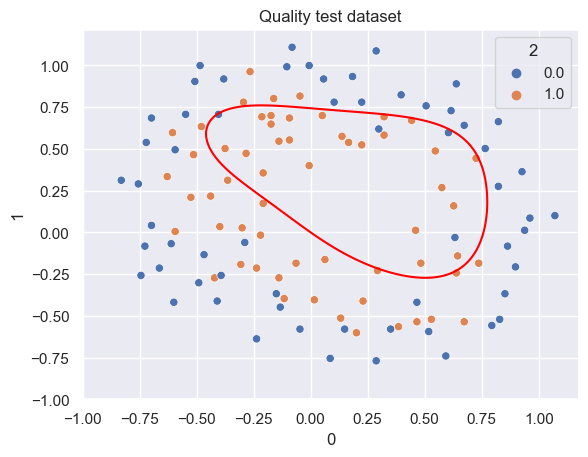

In [12]:
# Plot Decision boundary
fig, axes = plt.subplots();
plt.title('Quality test dataset')
sns.scatterplot(data=df, x=df[0], y=df[1], hue=df[2]);

plotDecisionBoundary(weight[1:], axes);

# L2 Regularization Regression

### Model Functions

In [13]:
def ridge_regression(X, y, alpha, lambda_value, epochs):
    
    N_samples = np.shape(X)[0]  # total number of samples
    N_features = np.shape(X)[1]  # total number of features
 
    # for W_0
    X = np.concatenate((np.ones((N_samples, 1)), X), axis=1)
    W = np.random.randn(N_features + 1, )
 
    cost_history_list = []
 
    for _ in range(epochs):
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
 
        # regularization term
        ridge_reg_term = (lambda_value / 2 * N_samples) * np.sum(np.square(W))
 
        # calculate the cost (MSE) + regularization term
        cost = (1 / 2 * N_samples) * np.sum(error ** 2) + ridge_reg_term
 
        # Update our gradient by the dot product between
        # x^T.error + lambda * W / number of samples
        gradient = (1 / N_samples) * (X.T.dot(error) + (lambda_value * W))
 
        # Now we have to update our weights
        W = W - alpha * gradient
        cost_history_list.append(cost)
 
    return W, cost_history_list

### Feed data to model

In [14]:
weight2, _ = ridge_regression(x, df.iloc[:, 2], alpha=.1,lambda_value=.01, epochs=10000)

In [15]:
l2_predicted = []
for i in x:
    if (np.dot(i,weight2[1:]))> 0.5:
        x1 = 1
    else:
        x1 = 0
    l2_predicted.append(x1)

### Report Accuracy

In [16]:
print("Accuracy of model is %.3f: " %(np.mean(l2_predicted ==  df.iloc[:, 2])))

Accuracy of model is 0.602: 


### plot the decision boundary

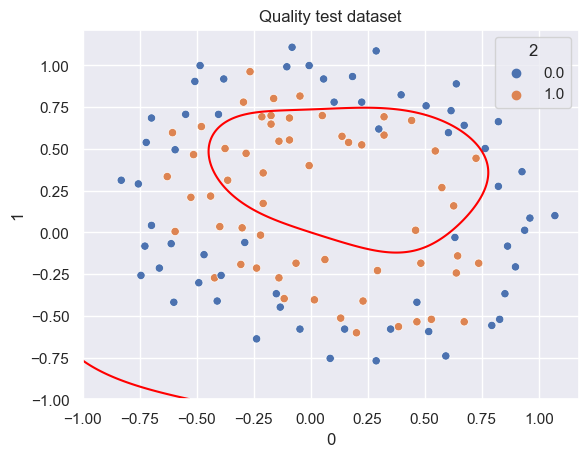

In [17]:
# Plot Decision boundary
fig, axes = plt.subplots();
plt.title('Quality test dataset')
sns.scatterplot(data=df, x=df[0], y=df[1], hue=df[2]);

plotDecisionBoundary(weight2[1:], axes);